## Title:Compare Rainfall Between London and Seattle

**Objective: Compare the total weekly rainfall between London and Seattle over a full year.**  

**In this notebook, we will:  
Fetch historical weather data using the Open-Meteo API.  
Parse and clean the data using pandas.  
Perform exploratory data analysis.  
Visualize weather trends.**  


In [2]:
# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Set up the parameters
# Coordinates of London

latitude_lon = 51.5074
longitude_lon = -0.1278

# Cordinates of Seattle

latitude_sea = 47.6062
longitude_sea = -122.3321

# Date range

start_date = '2022-01-01'
end_date = '2022-12-31'

# variables to fetch

hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']

In [8]:
# Make the API request for London
base_url = 'https://archive-api.open-meteo.com/v1/archive'

# Parameters for London
params_lon = {'latitude': latitude_lon,
         'longitude': longitude_lon,
         'start_date': start_date,
         'end_date': end_date,
         'hourly':','.join(hourly_variables),
         'timezone':'Europe/London'}

response_lon = requests.get(base_url, params=params_lon)

# check if request was successful

if response_lon.status_code==200:
    print('Request successful')
else:
    print(f"Request failed: {response_lon.status_code}")

Request successful


In [11]:
# Load the data in pandas DataFrame

data_lon = response_lon.json()
hourly_data = data_lon['hourly']
df_lon = pd.DataFrame(hourly_data)
df_lon.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2022-01-01T00:00,12.7,91,0.0
1,2022-01-01T01:00,12.7,93,0.0
2,2022-01-01T02:00,12.8,93,0.0
3,2022-01-01T03:00,12.5,93,0.0
4,2022-01-01T04:00,12.3,92,0.0


In [18]:
# Data cleaning
# Change time to date_time

df_lon['time'] = pd.to_datetime(df_lon['time'])

# Set time as index

df_lon.set_index('time', inplace=True)

# check for missing values 

df_lon.isna().sum()

# fill missing values, if any using forward fill method

df_lon.fillna(method='ffill', inplace=True)
df_lon.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2022-01-01 00:00:00,12.7,91,0.0
2022-01-01 01:00:00,12.7,93,0.0
2022-01-01 02:00:00,12.8,93,0.0
2022-01-01 03:00:00,12.5,93,0.0
2022-01-01 04:00:00,12.3,92,0.0


In [19]:
# Performing EDA 
df_lon.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,8760.000000,8760.000000,8760.000000
mean,12.013082,76.635388,0.075662
std,6.651766,16.722080,0.404500
min,-5.400000,17.000000,0.000000
25%,7.400000,65.000000,0.000000
50%,11.900000,81.000000,0.000000
75%,16.400000,90.000000,0.000000
max,38.000000,100.000000,14.700000


In [21]:
# Resampling hourly data in weekly average

df_lon_weekly = df_lon.resample('W').mean()
df_lon_weekly.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2022-01-02,12.077083,86.583333,0.045833
2022-01-09,4.293452,86.000000,0.076786
2022-01-16,3.513095,94.750000,0.018452
2022-01-23,2.611310,89.404762,0.000000
2022-01-30,4.813690,86.535714,0.000595


In [25]:
# Checking date range 
df_lon_weekly.index.max()

Timestamp('2023-01-01 00:00:00', freq='W-SUN')

In [26]:
# set max date to 2022-12-31 to keep the data confined to 2022

df_lon_weekly = df_lon_weekly[df_lon_weekly.index<='2022-12-31']
df_lon_weekly.index.max()

Timestamp('2022-12-25 00:00:00', freq='W-SUN')

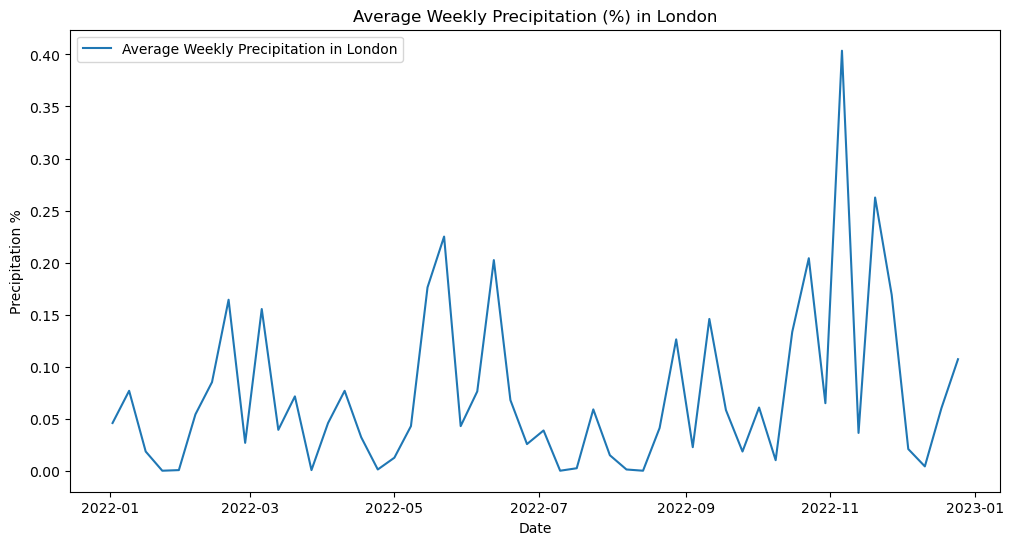

In [27]:
# Plot Precipation % Over Time on weekly average
plt.figure(figsize=(12,6))
plt.plot(df_lon_weekly.index, df_lon_weekly['precipitation'], label='Average Weekly Precipitation in London')
plt.xlabel('Date')
plt.ylabel('Precipitation %')
plt.title('Average Weekly Precipitation (%) in London')
plt.legend()
plt.show()

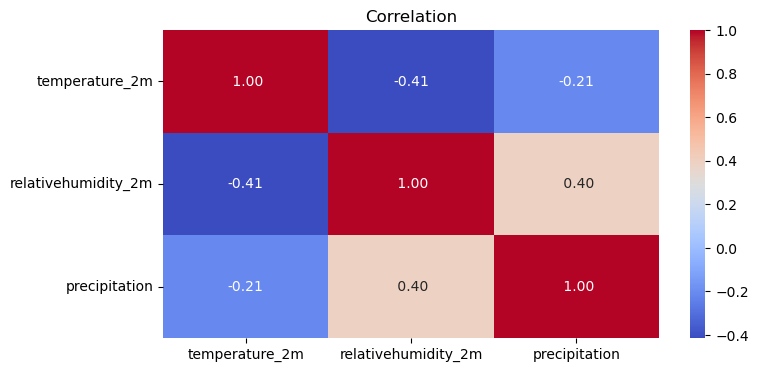

In [65]:
# import seabon to plot heatmap

import seaborn as sns

# Resampling data to daily average

daily_avg_lon=df_lon.resample('D').mean()

# Correlation
correlation_lon=daily_avg[['temperature_2m','relativehumidity_2m','precipitation']].corr()

# plot heatmap

plt.figure(figsize=(8,4))
sns.heatmap(correlation_lon, annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation')
plt.show()

Text(0.98, 1.02, 'Pairplot_Lndon')

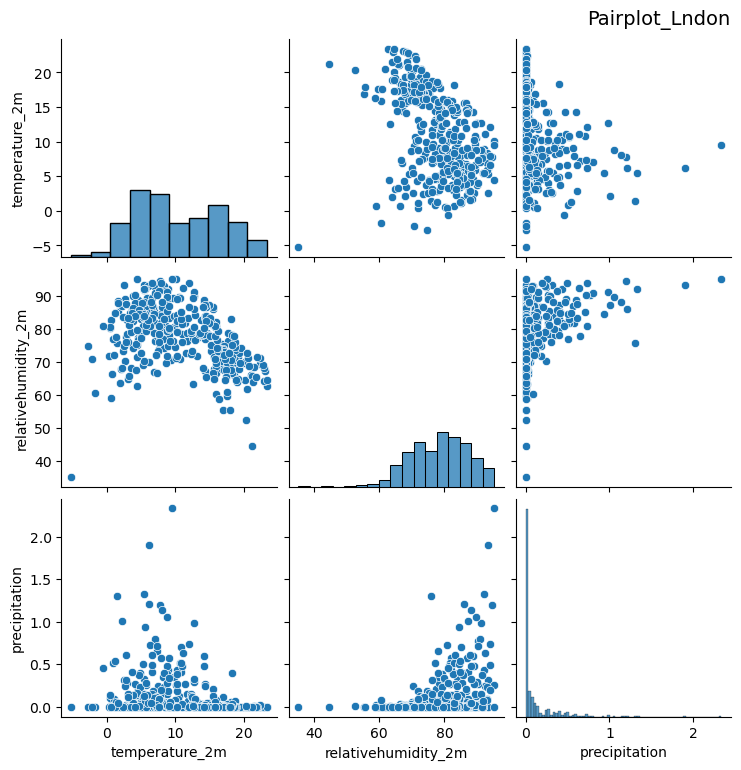

In [78]:
# plot pair plot 
plot=sns.pairplot(daily_avg[['temperature_2m','relativehumidity_2m','precipitation']])
plot.fig.suptitle('Pairplot_Lndon',x=0.98,y=1.02, horizontalalignment='right', fontsize=14)

In [16]:
# Make the API requests fro Seattle
params_sea = {'latitude': latitude_sea,
         'longitude': longitude_sea,
         'start_date': start_date,
         'end_date': end_date,
         'hourly':','.join(hourly_variables),
         'timezone':'America/Los_Angeles'} # using Los Angeles time zone


response_sea = requests.get(base_url, params=params_sea)

#  check if request was successful

if response_sea.status_code==200:
    print('Request successful')
else:
    print(f"Request failed: {response_sea.status_code}")

Request successful


In [17]:
# Load the data into Pandas dataframe

# Load the data in pandas DataFrame

data_sea = response_sea.json()
hourly_data = data_sea['hourly']
df_sea = pd.DataFrame(hourly_data)
df_sea.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2022-01-01T00:00,-6.3,77,0.0
1,2022-01-01T01:00,-6.4,76,0.0
2,2022-01-01T02:00,-8.3,82,0.0
3,2022-01-01T03:00,-8.1,82,0.0
4,2022-01-01T04:00,-7.9,81,0.0


In [29]:
# Data cleaning
# Change time to date_time

df_sea['time'] = pd.to_datetime(df_sea['time'])

# Set time as index

df_sea.set_index('time', inplace=True)

# check for missing values 

df_sea.isna().sum()

# fill missing values, if any using forward fill method

df_sea.fillna(method='ffill', inplace=True)
df_sea.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2022-01-01 00:00:00,-6.3,77,0.0
2022-01-01 01:00:00,-6.4,76,0.0
2022-01-01 02:00:00,-8.3,82,0.0
2022-01-01 03:00:00,-8.1,82,0.0
2022-01-01 04:00:00,-7.9,81,0.0


In [30]:
# Performing EDA 
df_sea.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,8760.000000,8760.000000,8760.000000
mean,10.484920,78.175799,0.129132
std,6.643276,14.031781,0.463708
min,-8.300000,20.000000,0.000000
25%,5.400000,69.000000,0.000000
50%,9.700000,81.000000,0.000000
75%,15.200000,89.000000,0.000000
max,31.100000,100.000000,7.700000


In [47]:
# Resampling hourly data in weekly average

df_sea_weekly = df_sea.resample('W').mean()
df_sea_weekly.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2022-01-02,-0.664583,75.250000,0.652083
2022-01-09,3.792262,86.642857,0.647619
2022-01-16,6.348810,91.000000,0.270833
2022-01-23,5.747024,90.690476,0.093452
2022-01-30,2.620833,79.458333,0.036310


In [32]:
# Checking date range 
df_sea_weekly.index.max()

Timestamp('2023-01-01 00:00:00', freq='W-SUN')

In [37]:
# set max date to 2022-12-31 to keep the data confined to 2022

df_sea_weekly = df_sea_weekly[df_sea_weekly.index<='2022-12-31']
df_sea_weekly.index.max()

Timestamp('2022-12-25 00:00:00', freq='W-SUN')

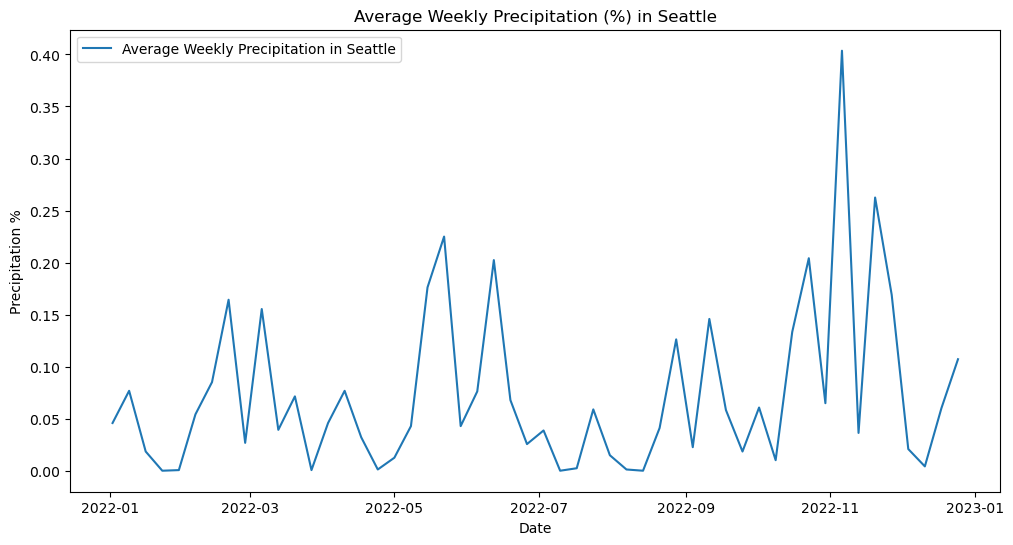

In [38]:
# Plot Precipation % Over Time on weekly average
plt.figure(figsize=(12,6))
plt.plot(df_sea_weekly.index, df_sea_weekly['precipitation'], label='Average Weekly Precipitation in Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation %')
plt.title('Average Weekly Precipitation (%) in Seattle')
plt.legend()
plt.show()

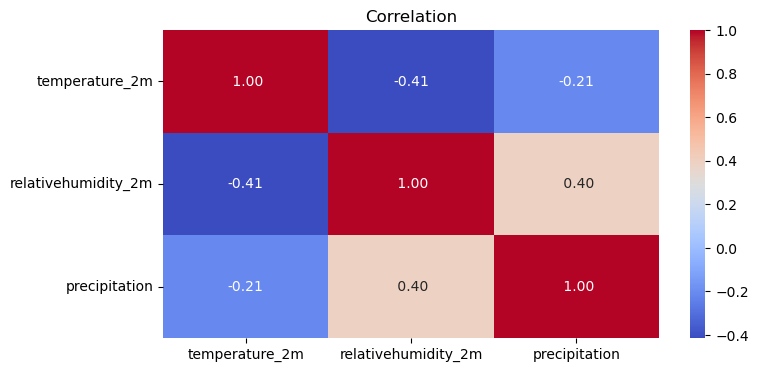

In [67]:

# Resampling data to daily average

daily_avg_sea=df_sea.resample('D').mean()

# Correlation
correlation_sea=daily_avg[['temperature_2m','relativehumidity_2m','precipitation']].corr()

# plot heatmap

plt.figure(figsize=(8,4))
sns.heatmap(correlation_sea, annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation')
plt.show()

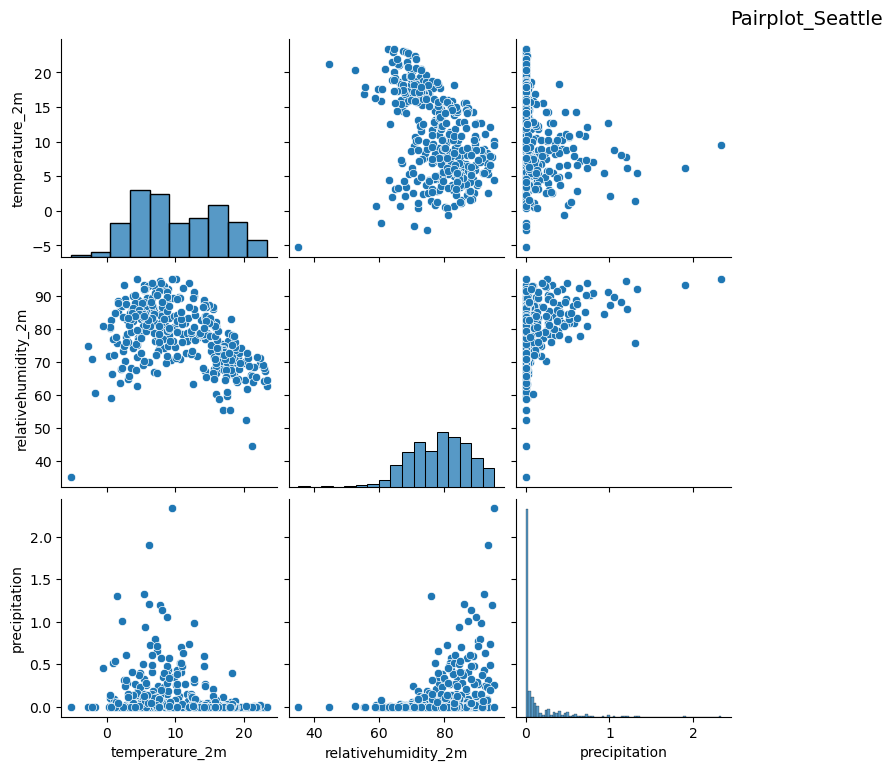

In [76]:
# plot pair plot 
plot=sns.pairplot(daily_avg_sea[['temperature_2m','relativehumidity_2m','precipitation']])
plot.fig.suptitle('Pairplot_Seattle',x=0.98, y=1.02, horizontalalignment='left', fontsize=14)
plt.show()

In [48]:
# Combine the dataframes for comparison
combined_precp = pd.DataFrame({'London': df_lon_weekly['precipitation'],
                               'Seattle': df_sea_weekly['precipitation']
                              })
combined_precp.head()

,London,Seattle
time,,
2022-01-02,0.045833,0.652083
2022-01-09,0.076786,0.647619
2022-01-16,0.018452,0.270833
2022-01-23,0.000000,0.093452
2022-01-30,0.000595,0.036310


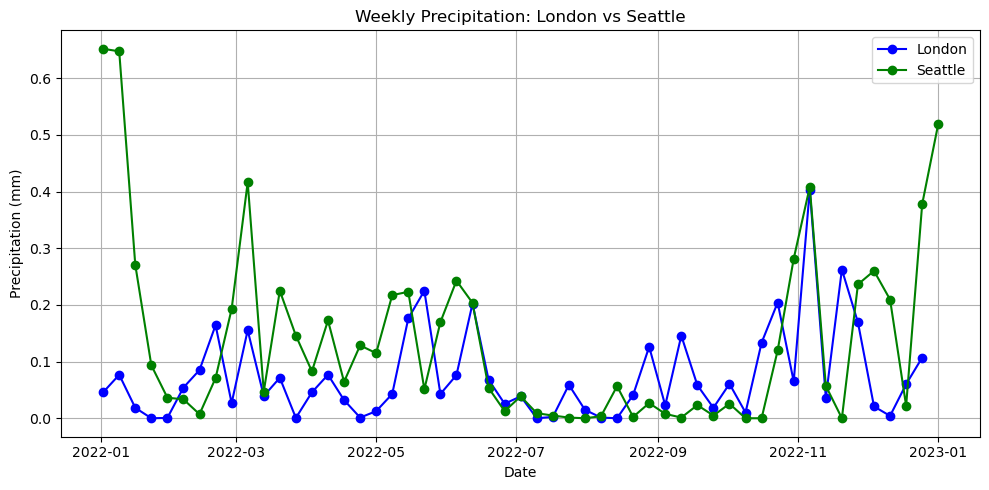

In [49]:
# Plotting both city lines
plt.figure(figsize=(10, 5))
plt.plot(combined_precp.index, combined_precp['London'], marker='o', label='London', color='blue')
plt.plot(combined_precp.index, combined_precp['Seattle'], marker='o', label='Seattle', color='green')

# Labels and legend
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Weekly Precipitation: London vs Seattle')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

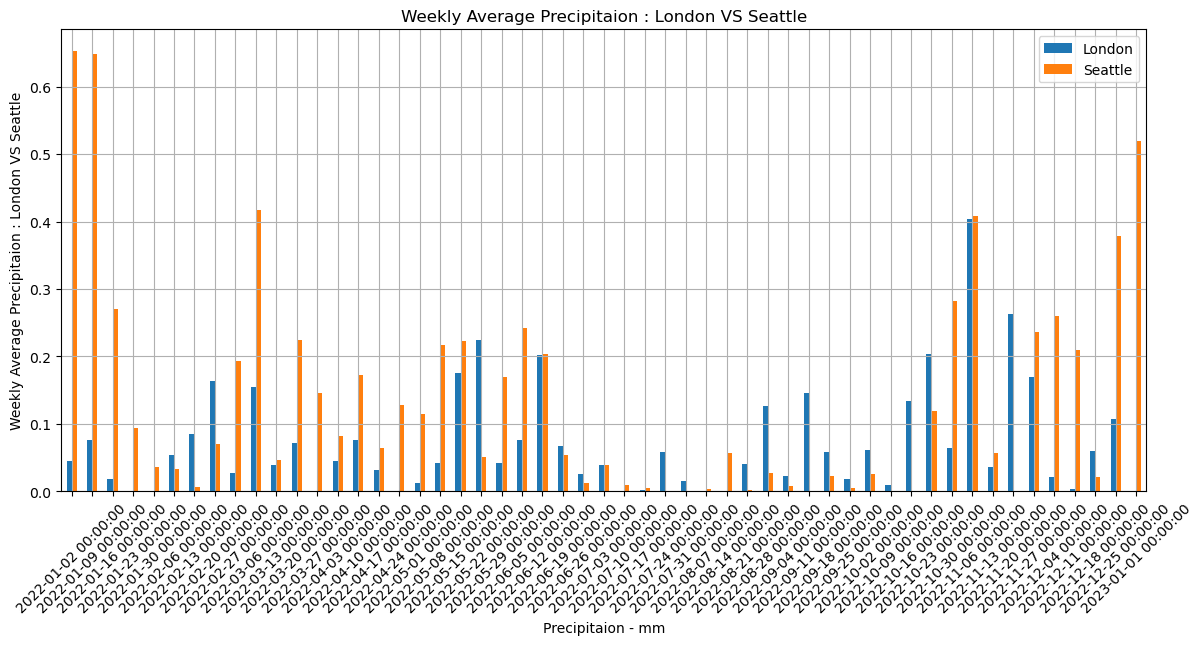

In [56]:
# Plot Barplot

combined_precp.plot(kind='bar', figsize=(14,6))
plt.xlabel('Precipitaion - mm')
plt.ylabel('Weekly Average Precipitaion : London VS Seattle')
plt.title('Weekly Average Precipitaion : London VS Seattle')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [53]:
# resampling weekly to monthly 
combined_precp_monthly=combined_precp.resample('M').mean()
combined_precp_monthly.head()

,London,Seattle
time,,
2022-01-31,0.028333,0.340060
2022-02-28,0.082589,0.076042
2022-03-31,0.066667,0.208631
2022-04-30,0.038988,0.112054
2022-05-31,0.099881,0.155238


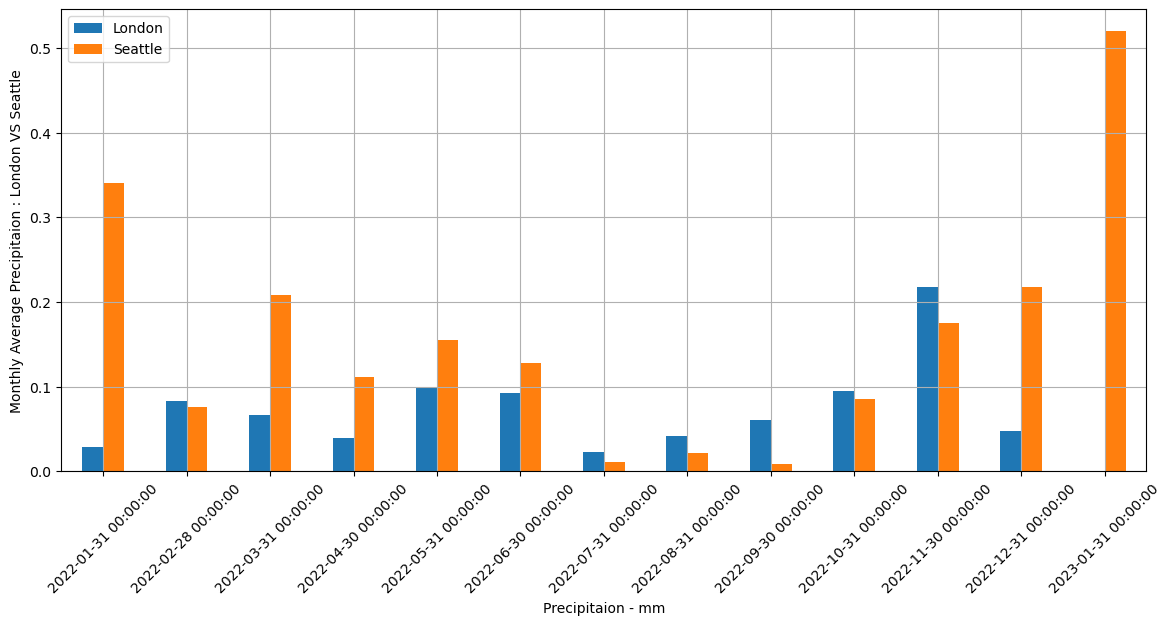

In [54]:
# Plot Barplot on Motnhly Average

combined_precp_monthly.plot(kind='bar', figsize=(14,6))
plt.xlabel('Precipitaion - mm')
plt.ylabel('Monthly Average Precipitaion : London VS Seattle')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

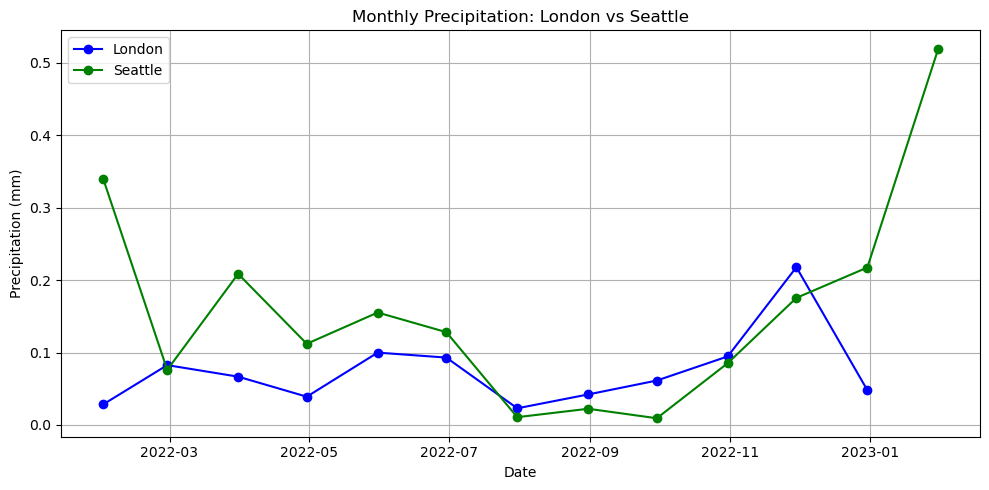

In [57]:
# Plotting both city lines - Monthly average Precipitaion
plt.figure(figsize=(10, 5))
plt.plot(combined_precp_monthly.index, combined_precp_monthly['London'], marker='o', label='London', color='blue')
plt.plot(combined_precp_monthly.index, combined_precp_monthly['Seattle'], marker='o', label='Seattle', color='green')

# Labels and legend
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Monthly Precipitation: London vs Seattle')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
# resampling dataframes to weekly total precpitaion 
weekly_total_precip_lon = df_lon.resample('W').sum()

weekly_total_precip_sea=df_sea.resample('W').sum()

print(weekly_total_precip_sea.head())
print(weekly_total_precip_lon.head())

            temperature_2m  relativehumidity_2m  precipitation
time                                                          
2022-01-02           -31.9                 3612           31.3
2022-01-09           637.1                14556          108.8
2022-01-16          1066.6                15288           45.5
2022-01-23           965.5                15236           15.7
2022-01-30           440.3                13349            6.1
            temperature_2m  relativehumidity_2m  precipitation
time                                                          
2022-01-02           579.7                 4156            2.2
2022-01-09           721.3                14448           12.9
2022-01-16           590.2                15918            3.1
2022-01-23           438.7                15020            0.0
2022-01-30           808.7                14538            0.1


In [82]:
# Calculating the total week difference in precipitation
weekly_total_diff = weekly_total_precip_sea['precipitation']-weekly_total_precip_lon['precipitation']
weekly_total_diff.head()

time
2022-01-02    29.1
2022-01-09    95.9
2022-01-16    42.4
2022-01-23    15.7
2022-01-30     6.0
Freq: W-SUN, Name: precipitation, dtype: float64

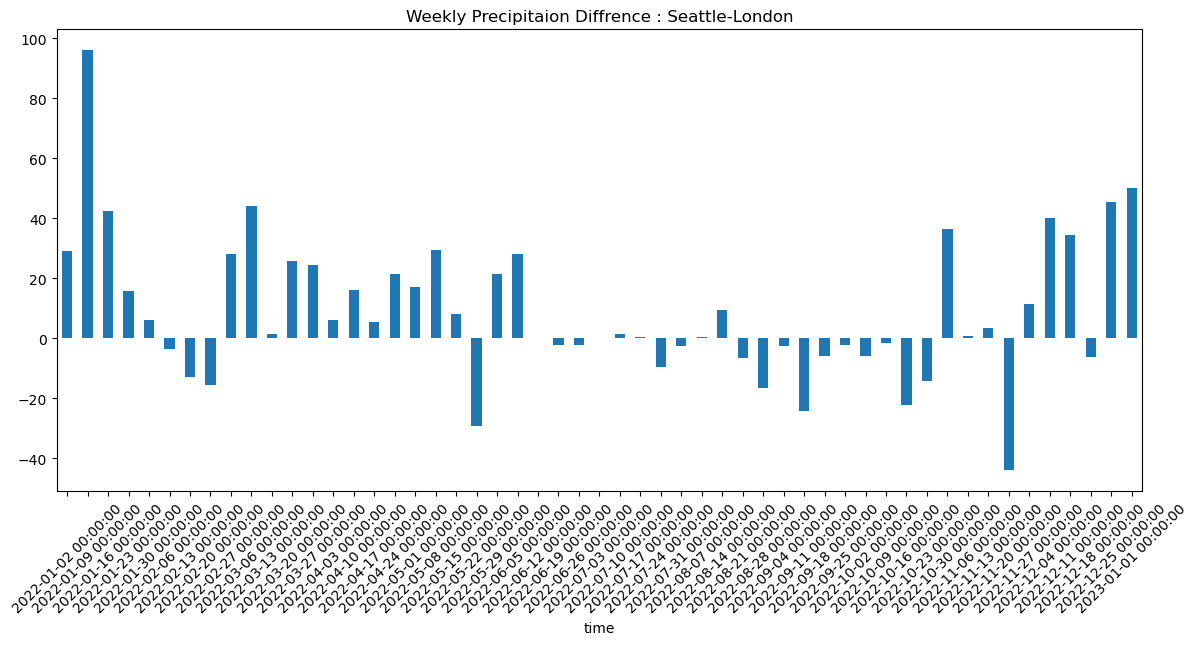

In [86]:
# Plot weekly diffrence in precipitaion 
weekly_total_diff.plot(kind='bar', figsize=(14,6))
plt.title('Weekly Precipitaion Diffrence : Seattle-London')
plt.xticks(rotation=45)
plt.show()

## Conclusion:
**Based on the weekly monthly total precipitation data for London and Seattle, it shows that Seattle consistently receives higher total rainfall than London across many weeks, with more intense and irregular spikes, especially during the winter and late fall months (January, March, and November–December). In contrast, London shows steadier but lighter rainfall, with fewer extreme weeks and more consistent weekly precipitation throughout the year. A cumulative precipitation analysis reveals that Seattle accumulates significantly more rainfall over time, particularly driven by a few high-rainfall events. Additionally, precipitaion difference plots confirm that Seattle typically exceeds London in weekly totals, though London occasionally surpasses Seattle during isolated weeks. Overall, the data suggests that Seattle experiences a wetter and more volatile precipitation pattern, while London has milder and more evenly distributed rainfall.**